<a href="https://colab.research.google.com/github/kavyasirisha/-KavyaDev/blob/main/Banking_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking Customer Churn Prediction


## Import all the necessary libraries

In [ ]:

#for numerical calculation
import numpy as np

#importing dataset
import pandas as pd

#lib for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#splitting data into traintestsplit
from sklearn.model_selection import train_test_split

# standadization
from sklearn.preprocessing import StandardScaler


# evaluation metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import classification_report

#modeling - algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Data Loading and Understanding

In [ ]:
# load the csv dataset using pandas
df = pd.read_csv("Banking_churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,01/11/2019
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,06/08/2019
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03/11/2019


In [ ]:
df.shape

(28382, 21)

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,01/11/2019
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,06/08/2019
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03/11/2019


In [ ]:
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,22/10/2019
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,17/12/2019
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,31/12/2019
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,02/11/2019


## Preprocessing the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [ ]:
df.count()

customer_id                       28382
vintage                           28382
age                               28382
gender                            27857
dependents                        25919
occupation                        28302
city                              27579
customer_nw_category              28382
branch_code                       28382
current_balance                   28382
previous_month_end_balance        28382
average_monthly_balance_prevQ     28382
average_monthly_balance_prevQ2    28382
current_month_credit              28382
previous_month_credit             28382
current_month_debit               28382
previous_month_debit              28382
current_month_balance             28382
previous_month_balance            28382
churn                             28382
last_transaction                  28382
dtype: int64

In [ ]:
# check the missing values

df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
#find the percentage of dependents missing values

percent_missing = df.isnull().sum()/len(df) * 100
print(percent_missing)


customer_id                       0.000000
vintage                           0.000000
age                               0.000000
gender                            1.849764
dependents                        8.678035
occupation                        0.281869
city                              2.829258
customer_nw_category              0.000000
branch_code                       0.000000
current_balance                   0.000000
previous_month_end_balance        0.000000
average_monthly_balance_prevQ     0.000000
average_monthly_balance_prevQ2    0.000000
current_month_credit              0.000000
previous_month_credit             0.000000
current_month_debit               0.000000
previous_month_debit              0.000000
current_month_balance             0.000000
previous_month_balance            0.000000
churn                             0.000000
last_transaction                  0.000000
dtype: float64


## Taking care of missing values

1. Drop the column if the missing data is more than 40%
   eg : dependents data has more than 40 % missing data
2. Drop the missing value records
   eg: df.dropna()
3. Fill numerical missing values with mean(avg value) and median(middle value - less affected by outliers)
    eg - df['city']= df['city'].fillna(df['city'].mean())
    eg - df['city']= df['city'].fillna(df['city'].median())
4. Fill the object or categorical data with mode(most repeated value)
    eg - eg - df['gender']= df['gender'].fillna(df['gender'].mean())

In [ ]:
df1= df.copy()

In [ ]:
df1

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,01/11/2019
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,06/08/2019
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03/11/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,22/10/2019
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,17/12/2019
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,31/12/2019
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [ ]:
#The dependents column has 86% of missing data.. dorp the column

df1= df1.drop(columns = ['dependents'], axis=1)

In [ ]:
df1.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
# dropping customerID column as this is not required for modelling

df1 = df1.drop(columns=["customer_id"])

In [ ]:
df1.head(2)

,vintage,age,gender,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,Male,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019
1,2348,35,Male,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,01/11/2019


In [ ]:
df1 = df1.dropna()

In [ ]:
df1.head()

,vintage,age,gender,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,Male,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019
2,2194,31,Male,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,1579,42,Male,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03/11/2019
5,1923,42,Female,self_employed,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,01/11/2019
6,2048,72,Male,retired,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,24/09/2019


In [ ]:
df1.isnull().sum()

vintage                           0
age                               0
gender                            0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [ ]:
df1.shape

(26990, 19)

## Visualization

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26990 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         26990 non-null  int64  
 1   age                             26990 non-null  int64  
 2   gender                          26990 non-null  object 
 3   occupation                      26990 non-null  object 
 4   city                            26990 non-null  float64
 5   customer_nw_category            26990 non-null  int64  
 6   branch_code                     26990 non-null  int64  
 7   current_balance                 26990 non-null  float64
 8   previous_month_end_balance      26990 non-null  float64
 9   average_monthly_balance_prevQ   26990 non-null  float64
 10  average_monthly_balance_prevQ2  26990 non-null  float64
 11  current_month_credit            26990 non-null  float64
 12  previous_month_credit           26990

In [ ]:
# checking the class distribution of target column
print(df1["churn"].value_counts())

churn
0    22008
1     4982
Name: count, dtype: int64


<Axes: xlabel='churn', ylabel='count'>

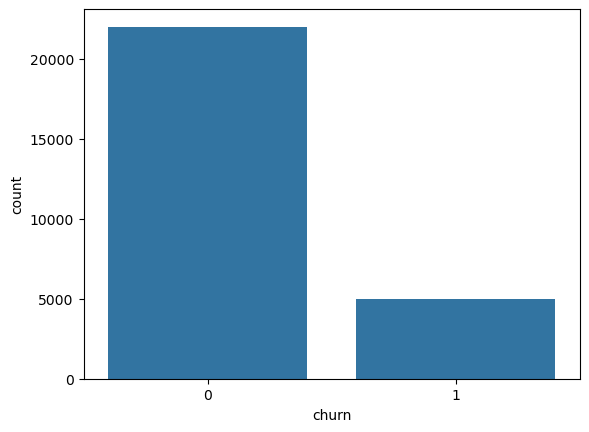

In [ ]:
sns.countplot(x='churn',data=df1)

In [ ]:
print(df1['gender'].value_counts())

gender
Male      15981
Female    11009
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='gender'>

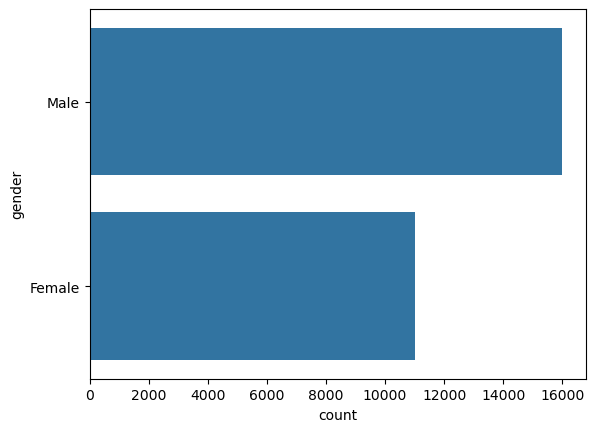

In [ ]:
sns.countplot(df1['gender'])

<Axes: xlabel='gender', ylabel='count'>

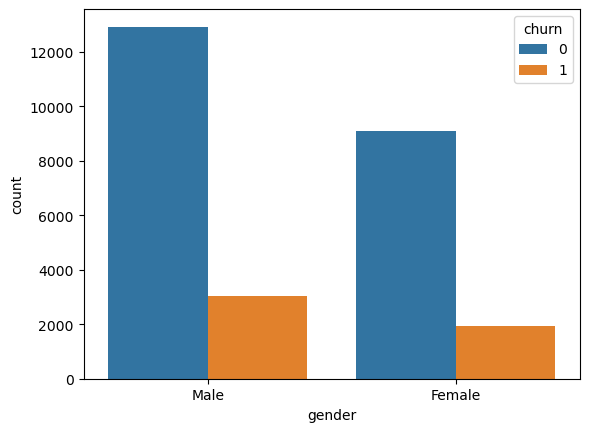

In [ ]:
sns.countplot(df1, x='gender', hue='churn')

<Axes: xlabel='occupation', ylabel='vintage'>

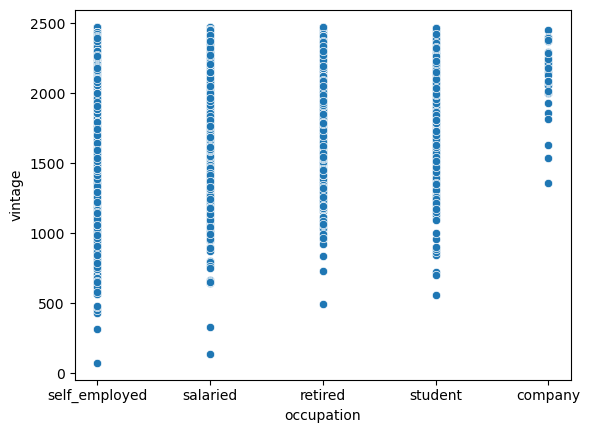

In [ ]:
sns.scatterplot(data=df1,x='occupation', y='vintage')

<Axes: xlabel='occupation', ylabel='vintage'>

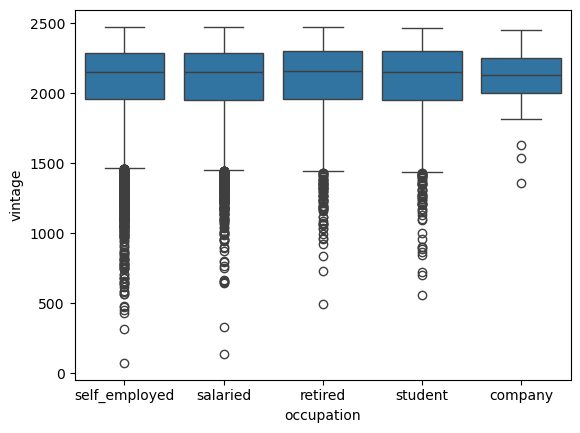

In [ ]:
sns.boxplot(data=df1,x='occupation', y='vintage')

<Axes: xlabel='occupation'>

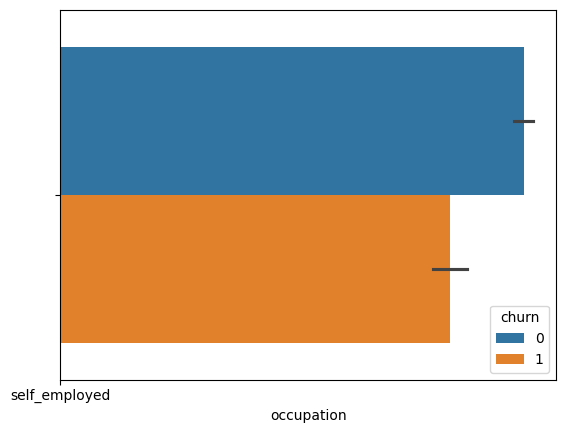

In [ ]:
sns.barplot(data=df1,x='occupation', hue ='churn')

<Axes: xlabel='occupation', ylabel='count'>

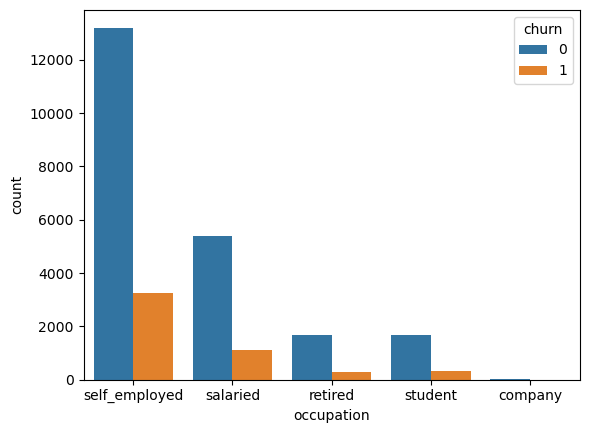

In [ ]:
sns.countplot(data=df1,x='occupation', hue ='churn')

## Convert categorical data to numerical

gender and occupation columns - getdummeies, mapping, label encoding and onehot encoding

1. getdummies : df1= df1.get_dummies(df1,columns = ['gender'])
2. mapping : df['occupation'] = df['occupation'].map({'company':0, 'student':1, 'salaried' :2, 'self_employed':3, retiredoccupation':4})
3. label encoding:
       from sklearn.preprocessing import LabelEncoding
       le = LabelEncoding()
       df1['churn']= le.fit_transform(df1['churn']
       df1
   

In [ ]:
#using get dummies

df1=pd.get_dummies(df1,columns=['gender'])
df1

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,gender_Female,gender_Male
0,2101,66,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21/05/2019,False,True
2,2194,31,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,False,True
4,1579,42,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03/11/2019,False,True
5,1923,42,self_employed,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,01/11/2019,True,False
6,2048,72,retired,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,24/09/2019,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,22/10/2019,True,False
28378,1537,34,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,17/12/2019,True,False
28379,2376,47,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,31/12/2019,False,True
28380,1745,50,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT,False,True


In [ ]:
df1= df1.drop(columns= ['last_transaction'], axis=1)

In [ ]:
df1['occupation'].value_counts()

occupation
self_employed    16481
salaried          6509
student           2005
retired           1964
company             31
Name: count, dtype: int64

In [ ]:
df1['occupation'] = df1['occupation'].map({'company':0, 'student':1, 'salaried' :2, 'self_employed':3, 'retired':4})

In [ ]:
df1.head()

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male
0,2101,66,3,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,False,True
2,2194,31,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,False,True
4,1579,42,3,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,False,True
5,1923,42,3,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,True,False
6,2048,72,4,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,False,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26990 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         26990 non-null  int64  
 1   age                             26990 non-null  int64  
 2   occupation                      26990 non-null  int64  
 3   city                            26990 non-null  float64
 4   customer_nw_category            26990 non-null  int64  
 5   branch_code                     26990 non-null  int64  
 6   current_balance                 26990 non-null  float64
 7   previous_month_end_balance      26990 non-null  float64
 8   average_monthly_balance_prevQ   26990 non-null  float64
 9   average_monthly_balance_prevQ2  26990 non-null  float64
 10  current_month_credit            26990 non-null  float64
 11  previous_month_credit           26990 non-null  float64
 12  current_month_debit             26990

In [ ]:
correlation= df1.corr()

In [ ]:
dataset=df1.drop(columns='churn')

In [ ]:
dataset.head(2)

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male
0,2101,66,3,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,False,True
2,2194,31,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,False,True


<Axes: title={'center': 'Correlated with churn Column'}>

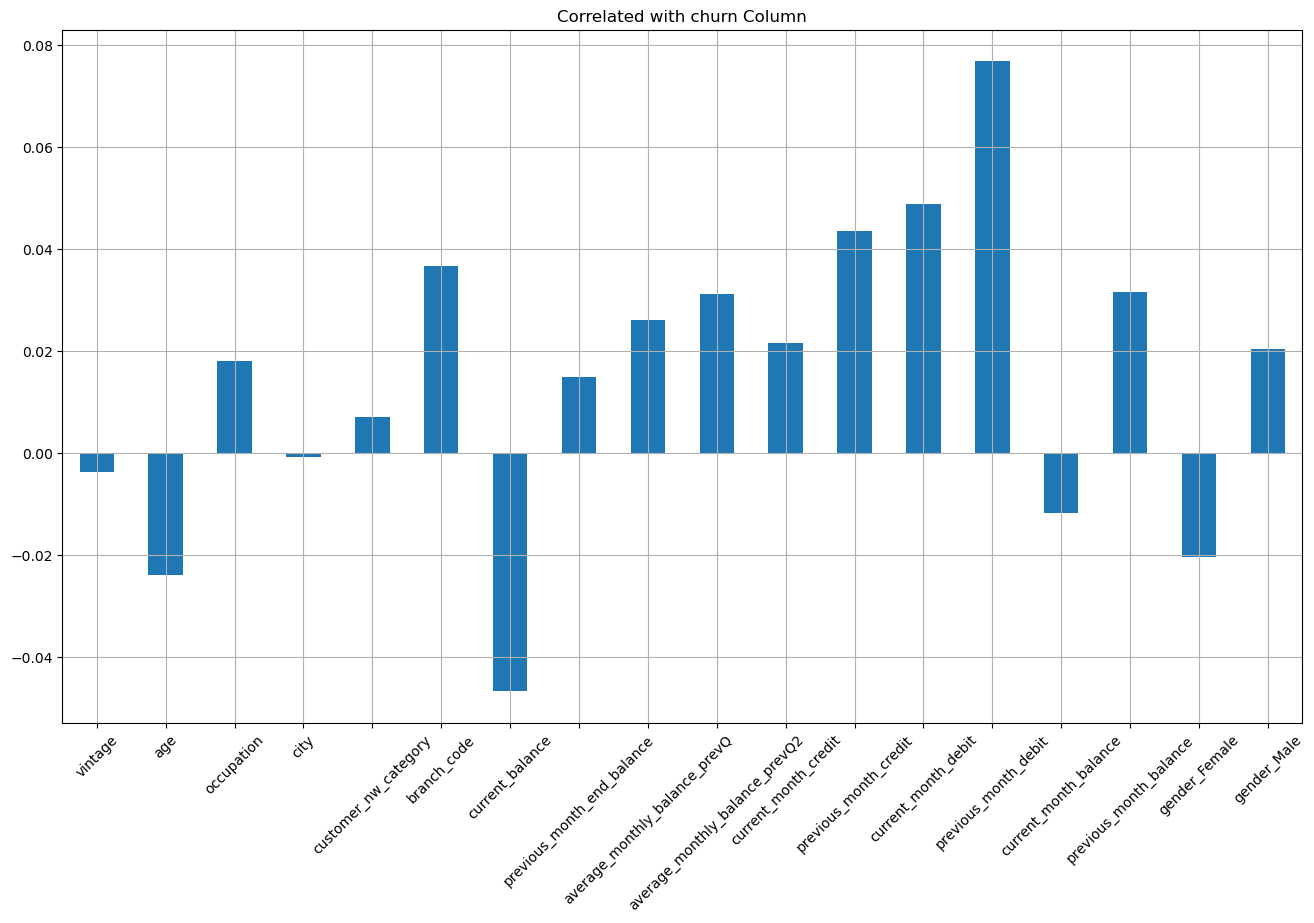

In [ ]:
dataset.corrwith(df1['churn']).plot.bar(figsize=(16,9), title='Correlated with churn Column', rot = 45,grid = True)

<Axes: >

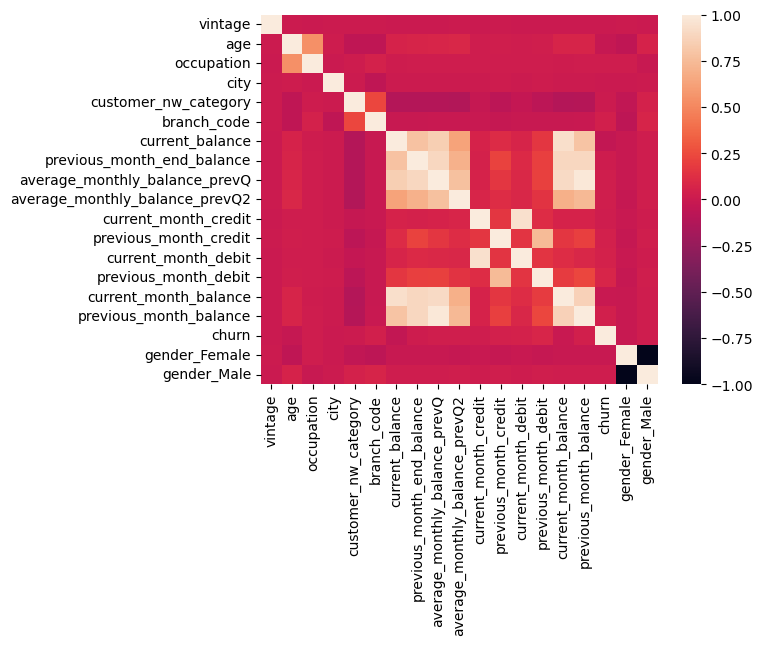

In [ ]:
sns.heatmap(correlation)

<Axes: >

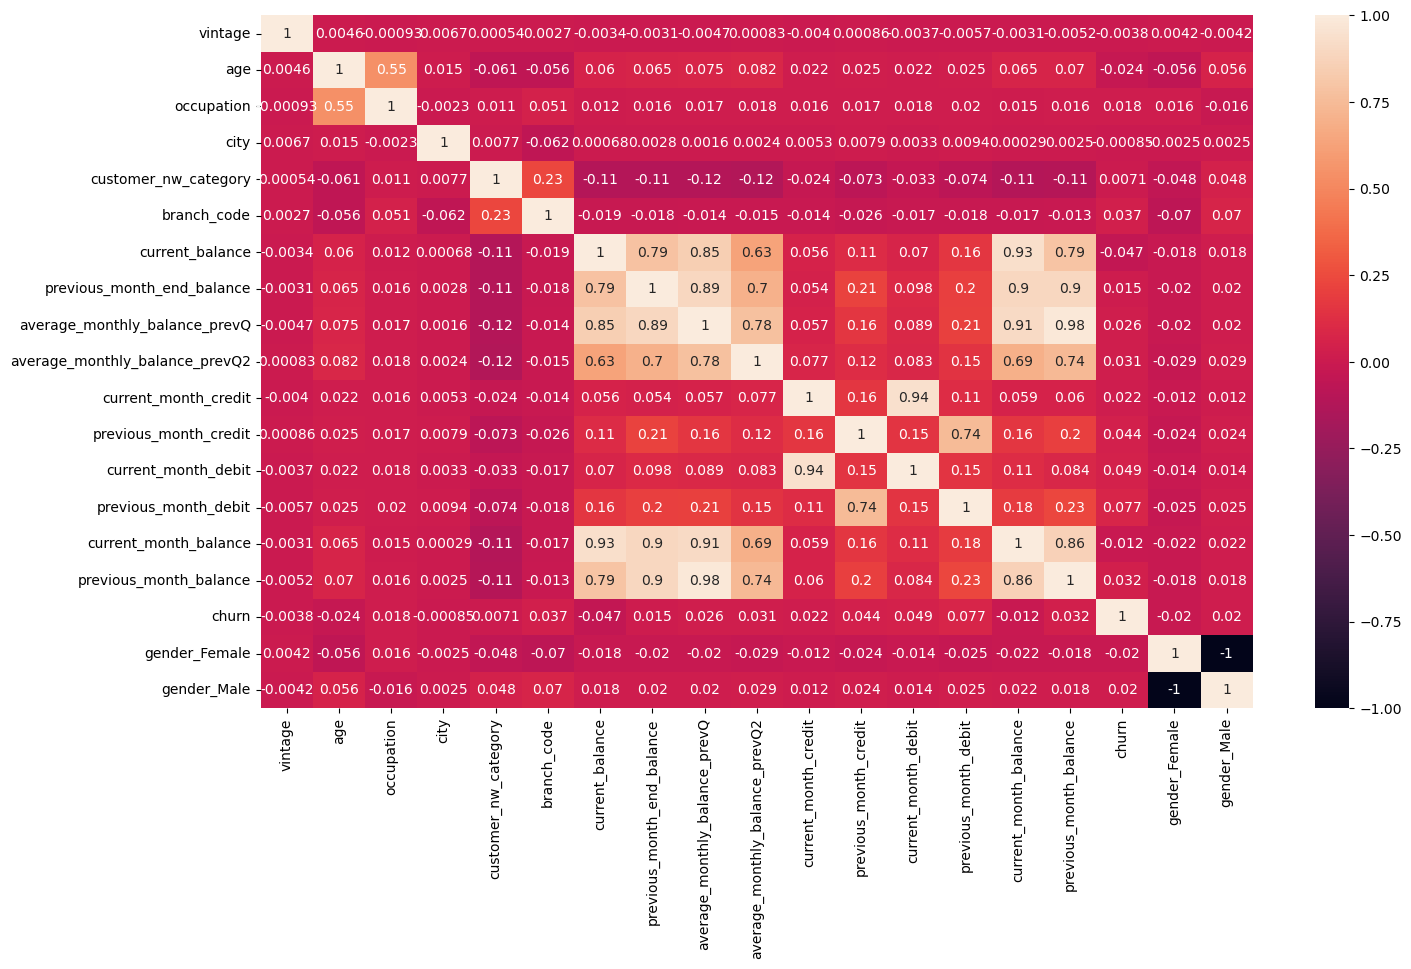

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True)

Splitting the dataset into dependent and independent variables

x(predectors)-
y(target)-

In [ ]:
x= df1.drop(columns='churn')
y= df1['churn']

In [ ]:
x

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male
0,2101,66,3,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,False,True
2,2194,31,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,False,True
4,1579,42,3,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,False,True
5,1923,42,3,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,True,False
6,2048,72,4,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,1,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,True,False
28378,1537,34,3,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,True,False
28379,2376,47,2,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,False,True
28380,1745,50,3,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,False,True


In [ ]:
y

0        0
2        0
4        1
5        0
6        0
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 26990, dtype: int64

## Splitting the dataset into the Training set and Test set

In [ ]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print('xtrain', xtrain.shape)
print('xtest', xtest.shape)
print('train', ytrain.shape)
print('ytest', ytest.shape)

xtrain (18893, 18)
xtest (8097, 18)
train (18893,)
ytest (8097,)


In [ ]:
xtrain

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male
5165,2167,61,2,334.0,1,1364,13793.03,670.68,8501.72,2628.33,11512.79,0.90,524.49,14613.95,9948.88,12041.14,False,True
27472,2158,34,3,146.0,2,1300,864.30,66.54,2616.09,5581.38,2108.02,487.78,1390.83,2259.27,264.90,327.11,False,True
25161,2197,30,3,691.0,3,3287,1598.75,1598.75,1598.75,1592.56,0.13,0.13,0.13,0.13,1598.75,1598.75,False,True
23270,2397,40,3,1020.0,3,129,1467.04,355.66,1656.22,1538.40,0.60,28.60,594.00,3100.66,695.66,2404.50,True,False
17117,2316,52,3,1046.0,1,1248,2098.17,7543.95,2686.75,1386.87,643.40,1429.11,6447.99,1719.64,1691.29,3399.32,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22680,1782,44,3,714.0,2,2150,3237.98,3380.83,3578.33,4399.51,0.07,0.07,285.79,857.21,3242.90,3500.65,False,True
5662,2292,46,3,1181.0,3,235,15184.19,15184.19,15184.19,15144.53,0.19,0.19,0.19,0.19,15184.19,15184.19,False,True
905,2302,35,3,491.0,3,615,88.20,76.18,4821.66,880.58,354.51,49869.71,121.06,586.89,89.18,1937.81,False,True
16618,2314,24,3,905.0,2,1832,33061.16,32000.34,31998.64,24359.72,0.64,0.64,4294.29,6488.70,32117.21,32477.95,False,True


In [ ]:
xtest

,vintage,age,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male
22534,1808,38,3,334.0,2,1290,5332.01,5260.01,5282.16,7887.69,0.11,0.11,0.11,0.11,5272.42,5262.38,False,True
16650,2044,42,2,146.0,2,1753,2487.76,64.55,1730.48,770.73,2393.86,68.24,151.30,2165.00,1185.06,2080.10,True,False
8885,2341,53,2,1092.0,1,624,8511.50,2908.50,4322.86,3130.79,5600.37,0.37,0.37,201.01,6771.08,3089.04,False,True
3369,2137,70,3,1096.0,1,1345,3047.47,2498.90,2776.50,2545.09,549.27,553.56,0.70,1082.08,2744.81,2682.09,True,False
24452,1555,36,3,272.0,3,267,3018.41,3089.84,3098.23,3337.08,0.57,0.57,0.57,0.57,3052.89,3122.10,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,2158,89,3,409.0,2,11,2139.09,2496.24,2496.24,3265.38,0.57,0.57,0.57,0.57,2139.09,2496.24,True,False
20982,2338,24,3,409.0,3,1672,1651.14,1604.34,1711.14,4222.28,0.04,607.34,409.24,917.22,1584.22,1691.38,True,False
23130,2193,23,1,623.0,1,21,701.25,701.25,3066.84,3633.98,0.67,0.67,0.67,5000.67,701.25,2798.02,False,True
12239,2461,49,3,1020.0,3,79,4411.29,4411.29,4411.29,4383.32,0.19,0.19,0.19,0.19,4411.29,4411.29,True,False


In [ ]:
ytrain

5165     1
27472    1
25161    0
23270    1
17117    0
        ..
22680    0
5662     0
905      1
16618    0
24863    0
Name: churn, Length: 18893, dtype: int64

In [ ]:
ytest

22534    0
16650    0
8885     0
3369     0
24452    1
        ..
5507     0
20982    0
23130    1
12239    0
25201    1
Name: churn, Length: 8097, dtype: int64

## Feature Scaling

StandardScaler is a commonly used technique in machine learning for standardizing or scaling numerical features before fitting a model. It transforms the data by subtracting the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.


In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.transform(xtest)

In [ ]:
xtrain

array([[ 0.28616899,  0.79919575, -0.94379184, ...,  0.28455918,
        -0.83679985,  0.83679985],
       [ 0.25327507, -0.78708357,  0.44211359, ..., -0.36717191,
        -0.83679985,  0.83679985],
       [ 0.39581539, -1.02208791,  0.44211359, ..., -0.29642194,
        -0.83679985,  0.83679985],
       ...,
       [ 0.77957777, -0.72833248,  0.44211359, ..., -0.27755772,
        -0.83679985,  0.83679985],
       [ 0.82343633, -1.37459443,  0.44211359, ...,  1.42159779,
        -0.83679985,  0.83679985],
       [ 0.66993138,  0.21168489,  0.44211359, ..., -0.27303779,
        -0.83679985,  0.83679985]])

In [ ]:
xtest

array([[-1.02593289, -0.55207922,  0.44211359, ..., -0.09258931,
        -0.83679985,  0.83679985],
       [-0.16338124, -0.31707488, -0.94379184, ..., -0.26964117,
         1.1950289 , -1.1950289 ],
       [ 0.92211809,  0.32918706, -0.94379184, ..., -0.21350698,
        -0.83679985,  0.83679985],
       ...,
       [ 0.38119587, -1.43334551, -2.32969727, ..., -0.2296984 ,
        -0.83679985,  0.83679985],
       [ 1.36070367,  0.09418272,  0.44211359, ..., -0.13994123,
         1.1950289 , -1.1950289 ],
       [ 0.17652259, -0.6695814 ,  0.44211359, ..., -0.11390209,
         1.1950289 , -1.1950289 ]])

In [ ]:
ytrain

5165     1
27472    1
25161    0
23270    1
17117    0
        ..
22680    0
5662     0
905      1
16618    0
24863    0
Name: churn, Length: 18893, dtype: int64

In [ ]:
ytest

22534    0
16650    0
8885     0
3369     0
24452    1
        ..
5507     0
20982    0
23130    1
12239    0
25201    1
Name: churn, Length: 8097, dtype: int64

## Logistic Regression

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.
The model delivers a binary outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

The sigmoid function is a mathematical function used to map the predicted values to probabilities.
It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the “S” form.
The S-form curve is called the Sigmoid function or the logistic function.


![Screenshot 2025-03-05 at 15.35.27.png](attachment:619335d0-9da0-415e-908d-e4232a2f2bcf.png)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred_log = log.predict(xtest)

In [ ]:
ypred_log

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# evaluation metrics

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,accuracy_score,precision_score,f1_score

In [ ]:
cm = confusion_matrix(ytest,ypred_log)
cm

array([[6510,   42],
       [1405,  140]])

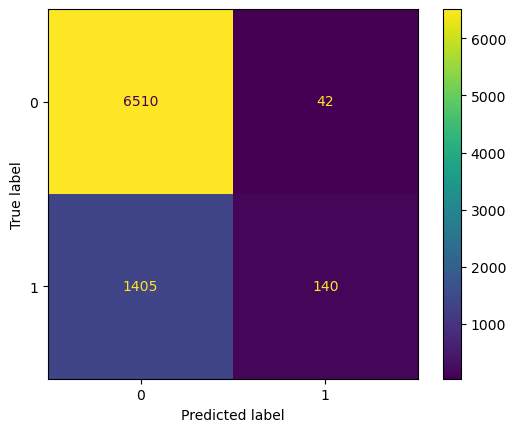

In [ ]:
display = ConfusionMatrixDisplay(cm,display_labels=log.classes_)
display.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_log))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6552
           1       0.77      0.09      0.16      1545

    accuracy                           0.82      8097
   macro avg       0.80      0.54      0.53      8097
weighted avg       0.81      0.82      0.76      8097



In [ ]:
acc=accuracy_score(ytest,ypred_log)
f1=f1_score(ytest,ypred_log)
prec=precision_score(ytest,ypred_log)
rec=recall_score(ytest,ypred_log)

In [ ]:

LogisticRegression_results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
LogisticRegression_results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.821292,0.162131,0.769231,0.090615


## Decision Tree Algorithm

1. The decision tree is a flowchart-like tree structure where a root note is a feature.
2. Root node divided into branches(decision rules) decides another decison node or leaf node known as sub trees
3. Leaf node is last node of decision tree contains output variable which is used to make predictions.

#parameters of decison tree

1. There are two Types of criteria (gini- impurity(default), entropy-gain)
2. max_depth: the maximum depth of the tree. the nodes are expanded untill all leaves contains mini sample.

![Decision tree.png](attachment:2c4f26ee-c0c1-4d27-b146-f724ef89ae58.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# default - gini
decisiontree=DecisionTreeClassifier(criterion='gini',max_depth=4)
# quality of split
decisiontree=decisiontree.fit(xtrain,ytrain)
ypred_dtc=decisiontree.predict(xtest)

In [ ]:
ypred_dtc

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cm=confusion_matrix(ytest,ypred_dtc)
print("Confusion Matrix ")
print(cm)

Confusion Matrix 
[[6294  258]
 [ 978  567]]


In [ ]:
print('Accuracy ',accuracy_score(ytest,ypred_dtc))

Accuracy  0.8473508706928492


In [ ]:
acc=accuracy_score(ytest,ypred_dtc)
f1=f1_score(ytest,ypred_dtc)
prec=precision_score(ytest,ypred_dtc)
rec=recall_score(ytest,ypred_dtc)

In [ ]:
DecisionTree_results_gini=pd.DataFrame([['Random Forest Classifier Gini',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])


In [ ]:
DecisionTree_results_gini

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classifier Gini,0.847351,0.478481,0.687273,0.36699


In [ ]:
#visualization of tree

from sklearn import tree
representation_tree = tree.export_text(decisiontree)
print(representation_tree)

|--- feature_6 <= -0.31
|   |--- feature_8 <= -0.23
|   |   |--- feature_6 <= -0.34
|   |   |   |--- feature_10 <= -0.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  -0.03
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  -0.34
|   |   |   |--- feature_9 <= -0.37
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  -0.37
|   |   |   |   |--- class: 0
|   |--- feature_8 >  -0.23
|   |   |--- feature_6 <= -0.32
|   |   |   |--- feature_11 <= 2.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  2.05
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  -0.32
|   |   |   |--- feature_8 <= -0.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  -0.03
|   |   |   |   |--- class: 1
|--- feature_6 >  -0.31
|   |--- feature_12 <= -0.04
|   |   |--- feature_13 <= -0.08
|   |   |   |--- feature_9 <= -0.35
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.35
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  -0.08
|   |   |  

In [ ]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
# quality of split
decisiontree=decisiontree.fit(xtrain,ytrain)
ypred_dtc=decisiontree.predict(xtest)

In [ ]:
ypred_dtc

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
cm=confusion_matrix(ytest,ypred_dtc)
print("Confusion Matrix ")
print(cm)

Confusion Matrix 
[[6224  328]
 [ 884  661]]


In [ ]:
print('Accuracy ',accuracy_score(ytest,ypred_dtc))

Accuracy  0.8503149314560948


In [ ]:
acc=accuracy_score(ytest,ypred_dtc)
f1=f1_score(ytest,ypred_dtc)
prec=precision_score(ytest,ypred_dtc)
rec=recall_score(ytest,ypred_dtc)

In [ ]:
DecisionTree_results_entropy=pd.DataFrame([['Random Forest Classifier entropy',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])


In [ ]:
DecisionTree_results_entropy

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classifier entropy,0.850315,0.521705,0.668352,0.427832


## Random Forest

Random forest is a collection of decision tree that works together to make predictions.
It takes different random parts of dataset to train each tree and then it combines the results by averaging them(bagging)
it helps to improve accuracy of predictions

RF based on ensemble technique
multiple decision trees are created from random training data.
Each tree trained on random subset of features which makes each tree unique

oob_score = out of bagg error( number of trees will be selected by using less oob score.
warm_start - add more trees to existing one tomreduce the execution time
n_jobs = -1 : multiple jobs ate the same time

![Screenshot 2025-03-05 at 15.30.30.png](attachment:f8de180d-11b4-4fc6-936d-ecb802789154.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(oob_score = True, random_state =36, warm_start= True, n_jobs = -1)

oob_list= list()
for n_trees in [10,20,30,40,50,60,70,80,150,250,560]:
    RFC.set_params(n_estimators = n_trees)
    RFC.fit(xtrain,ytrain)
    oob_error = 1-RFC.oob_score_
    oob_list.append(pd.Series({'n_trees' :n_trees,'oob error':oob_error}))

rfc_oob_df=pd.concat(oob_list,axis=1).T.set_index('n_trees')
rfc_oob_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob error
n_trees,
10.0,0.161224
20.0,0.146456
30.0,0.141587
40.0,0.139205
50.0,0.137405
60.0,0.136506
70.0,0.136611
80.0,0.136717
150.0,0.133647


<Axes: xlabel='n_trees'>

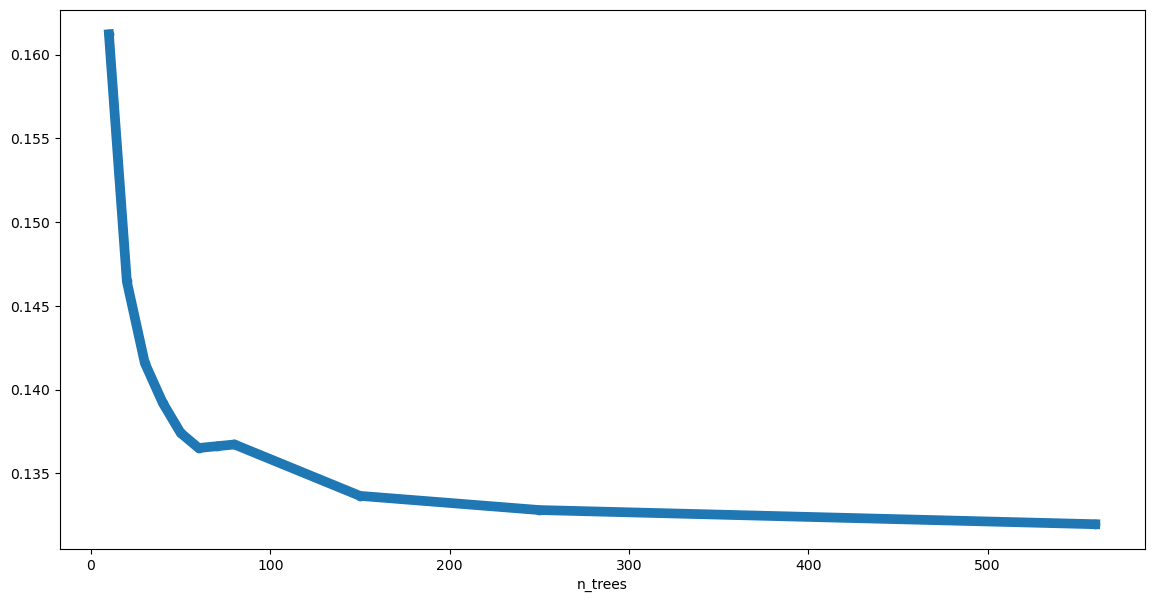

In [ ]:
rfc_oob_df.plot(legend=False,marker='o',figsize=(14,7), linewidth=7)


In [ ]:
rfc400= RandomForestClassifier(n_estimators = 400, oob_score= True, random_state= 39,n_jobs =-1)

rfc400.fit(xtrain,ytrain)
ypred_RFC = rfc400.predict(xtest)
ypred_RFC

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print(classification_report(ytest,ypred_RFC))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6552
           1       0.73      0.46      0.56      1545

    accuracy                           0.86      8097
   macro avg       0.81      0.71      0.74      8097
weighted avg       0.85      0.86      0.85      8097



In [ ]:
cm = confusion_matrix(ytest,ypred_RFC)
cm

array([[6286,  266],
       [ 833,  712]])

In [ ]:
acc=accuracy_score(ytest,ypred_RFC)
f1=f1_score(ytest,ypred_RFC)
prec=precision_score(ytest,ypred_RFC)
rec=recall_score(ytest,ypred_RFC)

In [ ]:

RandomForest_results=pd.DataFrame([['Random Forest',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
RandomForest_results

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.864271,0.564407,0.728016,0.460841


## SVM - SUPPORT VECTOR MACHINE

1. SVM is a supervised machine learning Algo which is used to slove classification and regression types
2. SVm algo is implemented using kernel.
3. kernel decides the decision and boundary shape.
4. HYPER PLANE: hyperplane are decision boundaries which seperates the data points in different class labels.
5. support vectors: sample data points which are closed to hyperplane.
6. Margin: gap between hypperplan and support vectors.

Types of kernel used in svm
1. Linear Kernel: It is suitable when the data is linearly separable meaning that a straight line
2. Polynomial kernel:  It is useful when the data is not linearly separable but still follows a pattern.
3. RBF (Radial Basis Function) kernel: Mostly used : It maps the data into an infinite-dimensional space making it highly effective for complex classification problems.
4. Gaussian kernel
5. Sigmoid Kernel

![SVM.png](attachment:b8cc23f8-bbe6-4e36-a103-000527d76d89.png)

In [ ]:
# svm

from sklearn.svm import SVC

In [ ]:
svc_linear = SVC(kernel = 'linear', random_state= 42)
svc_linear.fit(xtrain,ytrain)
ypred_svc_linear = svc_linear.predict(xtest)
ypred_svc_linear

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(ytest, ypred_svc_linear)

0.8107941212794862

In [ ]:
cm = confusion_matrix(ytest, ypred_svc_linear)
cm

array([[6547,    5],
       [1527,   18]])

In [ ]:
acc=accuracy_score(ytest,ypred_svc_linear)
f1=f1_score(ytest,ypred_svc_linear)
prec=precision_score(ytest,ypred_svc_linear)
rec=recall_score(ytest,ypred_svc_linear)

In [ ]:
svm_linear=pd.DataFrame([['SVM Linear',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
svm_linear

,Model,Accuracy,F1,Precision,Recall
0,SVM Linear,0.810794,0.022959,0.782609,0.01165


In [ ]:
svc_rbf = SVC(kernel = 'rbf', random_state= 42)
svc_rbf.fit(xtrain,ytrain)
ypred_svc_rbf = svc_rbf.predict(xtest)
ypred_svc_rbf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(ytest,ypred_svc_rbf)

0.8219093491416574

In [ ]:
# c controls training error and margin.
# A higher C value means the model will try harder to correctly classify all training examples, which might lead to overfitting.
#In contrast, a smaller C value allows for some misclassifications but tries to find a smoother decision boundary.

In [ ]:
svc = SVC(C=100.0)
svc.fit(xtrain,ytrain)
ypred_svc= svc.predict(xtest)
ypred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(ytest, ypred_svc)

0.8382116833395085

In [ ]:
svc = SVC(C=1000)
svc.fit(xtrain,ytrain)
ypred_svc= svc.predict(xtest)
ypred_svc
accuracy_score(ytest, ypred_svc)

0.8356181301716685

In [ ]:
acc=accuracy_score(ytest,ypred_svc)
f1=f1_score(ytest,ypred_svc)
prec=precision_score(ytest,ypred_svc)
rec=recall_score(ytest,ypred_svc)

In [ ]:
svc=pd.DataFrame([['Support vector classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
svc

,Model,Accuracy,F1,Precision,Recall
0,Support vector classifier,0.835618,0.468238,0.611691,0.379288


## K-Nearest Neighbor(KNN) Algorithm

1. it is a supervised machine learning algo used for bot classification and regression problems.
2. it uses p(distance) to make predictions.(euclidean(p=1) and manhattan(p=2))
3. k is just a number that tells the algorithm how many nearby points (neighbours) to look at when it makes a decision.

![Screenshot 2025-03-05 at 13.59.56.png](attachment:dc350347-1588-4cd6-b206-771a78481912.png)

In [ ]:
#model building
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#p=1;
knn5=KNeighborsClassifier(n_neighbors=5, p=1)
knn5.fit(xtrain,ytrain)
ypred_knn5 = knn5.predict(xtest)
ypred_knn5
accuracy_score(ytest,ypred_knn5)

0.8096825984932691

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=3, p=1)
knn3.fit(xtrain,ytrain)
ypred_knn3 = knn3.predict(xtest)
ypred_knn3
accuracy_score(ytest,ypred_knn3)

0.7967148326540694

In [ ]:
knn7=KNeighborsClassifier(n_neighbors=7, p=1)
knn7.fit(xtrain,ytrain)
ypred_knn7 = knn7.predict(xtest)
ypred_knn7
accuracy_score(ytest,ypred_knn7)

0.8115351364702976

In [ ]:
knn9=KNeighborsClassifier(n_neighbors=9, p=1)
knn9.fit(xtrain,ytrain)
ypred_knn9 = knn9.predict(xtest)
ypred_knn9
accuracy_score(ytest,ypred_knn9)

0.8123996541929109

In [ ]:
# p=2

knn32=KNeighborsClassifier(n_neighbors=3, p=2)
knn32.fit(xtrain,ytrain)
ypred_knn32 = knn32.predict(xtest)
ypred_knn32
accuracy_score(ytest,ypred_knn32)

0.7817710263060392

In [ ]:
knn5=KNeighborsClassifier(n_neighbors=5, p=2)
knn5.fit(xtrain,ytrain)
ypred_knn5 = knn5.predict(xtest)
ypred_knn5
accuracy_score(ytest,ypred_knn5)

0.8049895022847968

In [ ]:
knn7=KNeighborsClassifier(n_neighbors=7, p=2)
knn7.fit(xtrain,ytrain)
ypred_knn7 = knn7.predict(xtest)
ypred_knn7
accuracy_score(ytest,ypred_knn7)

0.8065950351982215

In [ ]:
knn9=KNeighborsClassifier(n_neighbors=9, p=2)
knn9.fit(xtrain,ytrain)
ypred_knn9 = knn9.predict(xtest)
ypred_knn9
accuracy_score(ytest,ypred_knn9)

0.8082005681116463

In [ ]:
knn9=KNeighborsClassifier(n_neighbors=9, p=1)
knn9.fit(xtrain,ytrain)
ypred_knn9 = knn9.predict(xtest)
ypred_knn9


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc=accuracy_score(ytest,ypred_knn9)
f1=f1_score(ytest,ypred_knn9)
prec=precision_score(ytest,ypred_knn9)
rec=recall_score(ytest,ypred_knn9)

In [ ]:
Knn=pd.DataFrame([['K-Nearest Neighbors',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
Knn

,Model,Accuracy,F1,Precision,Recall
0,K-Nearest Neighbors,0.8124,0.070948,0.644444,0.03754


## Naive Bayes

Naive bayes is a bayes theorem based probabilistic classification algo
it uses conditional probabilities of features to calculate the class likelihood od an instance.
It handles high- dimensional dataset

Bayes therem: Mathematical equation
P(y∣X)= P(X∣y)P(y)/ P(X)


In [ ]:
# modelling
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB = GaussianNB()
GNB.fit(xtrain,ytrain)
ypred_GNB= GNB.predict(xtest)
ypred_GNB

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Model Accuracy', accuracy_score(ytest,ypred_GNB))

Model Accuracy 0.8000494010127207


In [ ]:
acc=accuracy_score(ytest,ypred_GNB)
f1=f1_score(ytest,ypred_GNB)
prec=precision_score(ytest,ypred_GNB)
rec=recall_score(ytest,ypred_GNB)

In [ ]:
GNB=pd.DataFrame([['Gaussian Naive Bayes',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
GNB

,Model,Accuracy,F1,Precision,Recall
0,Gaussian Naive Bayes,0.800049,0.096036,0.349593,0.055663


## Evaluation Metric

# confusion matrix:
It also known as the error matrix, in the evaluation of the performance.
Components of Confusion Matrix:
A confusion matrix is a 2x2 table that is used to represent the results of a binary classification model.
It consists of four components:
1. True Positive (TP): The number of positive instances that are correctly classified as positive by the model.
2. False Positive (FP): The number of negative instances that are incorrectly classified as positive by the model.
3. True Negative (TN): The number of negative instances that are correctly classified as negative by the model.
4. False Negative (FN): The number of positive instances that are incorrectly classified as negative by the model.

    
    
Evalution Metrics for classification models provides a qanatitative assesment of model performance

1. Accuracy: It is the most used performance metric for binary classification models.
It measures the propogation of correct predictions made by the model out of all predictions.
a high accuracy indicates model is making large proportion of correct predictions

2. Precision:
Precision = TP / (TP + FP)
Precision is a metric that measures the proportion of true positive (TP) instances among the instances that are predicted as positive by the model.
precision measures the accuracy of the positive predictions made by the model.
A high precision score indicates that the model is able to accurately identify positive instances,


3. Recall:
Recall = TP / (TP + FN)

4. F1 score: F1-score is a performance metric that combines precision and recall to provide a comprehensive evaluation
A high F1-score indicates that the model is performing well in both precision and recall,
while a low F1-score indicates that the model is not performing well in either precision or recall.


In [ ]:
 pd.concat([LogisticRegression_results, DecisionTree_results_gini, DecisionTree_results_entropy, RandomForest_results, svc, Knn,GNB],ignore_index = True)

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.821292,0.162131,0.769231,0.090615
1,Random Forest Classifier Gini,0.847351,0.478481,0.687273,0.366990
2,Random Forest Classifier entropy,0.850315,0.521705,0.668352,0.427832
3,Random Forest,0.864271,0.564407,0.728016,0.460841
4,Support vector classifier,0.835618,0.468238,0.611691,0.379288
5,K-Nearest Neighbors,0.812400,0.070948,0.644444,0.037540
6,Gaussian Naive Bayes,0.800049,0.096036,0.349593,0.055663
